In [30]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + "D:\\Program Files (x86)\\Graphviz2.38\\bin\\"
# print(os.environ["PATH"])
import pydotplus

In [31]:
data = pd.read_csv('./modeldata1.csv',encoding="gbk")
data['target'] = data['是否逾期'].map({
    "是":1,
    "否":0
})
data = data.drop(['是否逾期'],axis=1)
data.head()

,申请时段,grade,closed_accounts,open_accounts,enquiry_alert,人脸相似度,电话使用时长,年龄,分区,信用卡额度使用率,...,历史近两年逾期最大天数,ULC33S,近三个月逾期天数,G207O,dsr_before,身份证号首字母,历史申请贷款查询数,开户成功率,total_monthly_obligation,target
0,21点,HH,14,5,57,0.34,Missing,35,元朗,0.98,...,18,220605,18,12357,73,Z,20,0.75,12702,0
1,22点,HH,1,5,63,0.55,两年以上,33,葵青,1.01,...,0,274346,0,8910,45,Z,6,0.17,9255,0
2,13点,II,29,6,71,0.54,两年以上,46,九龙城,0.65,...,0,309839,0,19507,82,G,30,1.10,19692,0
3,11点,II,20,4,58,0.56,两年以上,27,屯门,0.00,...,8,40806,8,2267,8,Y,27,0.63,2451,0
4,10点,HH,2,5,45,0.50,两年以上,28,屯门,0.98,...,0,240985,0,10775,22,Y,4,1.25,11120,0


In [32]:
import numbers
allFeatures = list(data.columns)
allFeatures.remove('target')

numerical_var = []
for col in allFeatures:
    if len(set(data[col])) == 1:
        print('delete {} from the dataset because it is a constant'.format(col))
        del data[col]
        allFeatures.remove(col)
    else:
        uniq_valid_vals = [i for i in data[col] if i == i]
        uniq_valid_vals = list(set(uniq_valid_vals))
        if len(uniq_valid_vals) >= 6 and isinstance(uniq_valid_vals[0], numbers.Real):
            numerical_var.append(col)

categorical_var = [i for i in allFeatures if i not in numerical_var]
print(numerical_var)
print(categorical_var)

['closed_accounts', 'open_accounts', 'enquiry_alert', '人脸相似度', '年龄', '信用卡额度使用率', '信用卡数', '信用卡平均额度', '贷款数', '贷款平均额度', '平均分期金额', '平均期数', '90天内贷款查询次数', '180天内贷款查询次数', '120天内信用卡查询次数', '365天内信用卡查询次数', '历史近两年逾期最大天数', 'ULC33S', '近三个月逾期天数', 'G207O', 'dsr_before', '历史申请贷款查询数', '开户成功率', 'total_monthly_obligation']
['申请时段', 'grade', '电话使用时长', '分区', '身份证号首字母']


In [33]:
from sklearn.preprocessing import StandardScaler
def preprocessing():
    
    
    #label = data['target']
    #data = data.drop(['target'],axis=1)
    #特征选择
    #考虑相关性，可以去除几个属性，但因为总体的属性不多，暂不处理
    #特征处理
    for i in range(len(numerical_var)):
        data[numerical_var[i]] = StandardScaler().fit_transform(data[numerical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    #处理离散值数值化
    for i in range(len(categorical_var)):
        if categorical_var[i] == "申请时段":
            data[categorical_var[i]] = [map_apply(s) for s in data["申请时段"].values]
            data[categorical_var[i]] = StandardScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        elif categorical_var[i] == "grade":
            data[categorical_var[i]] = [map_grade(w) for w in data['grade'].values]
            data[categorical_var[i]] = StandardScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            data[categorical_var[i]] = LabelEncoder().fit_transform(data[categorical_var[i]])
            #对于labelEncoder的情况下还需要进行归一化处理
            data[categorical_var[i]] = StandardScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    return data

def map_apply(s):
    d = dict([("0点",24),("1点",1),("2点",2),("3点",3),("4点",4),("5点",5),("6点",6),("7点",7),("8点",8),("9点",9),("10点",10),("11点",11),
             ("12点",12),("13点",13),("14点",14),("15点",15),("16点",16),("17点",17),("18点",18),("19点",19),("20点",20),("21点",21),
             ("22点",22),("23点",23)])
    return d.get(s,0)
def map_grade(w):
    d = dict([("AA",9),("BB",8),("CC",7),("DD",6),("EE",5),("FF",4),("GG",3),("HH",2),("II",1)])
    return d.get(w,0)

/Users/roy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


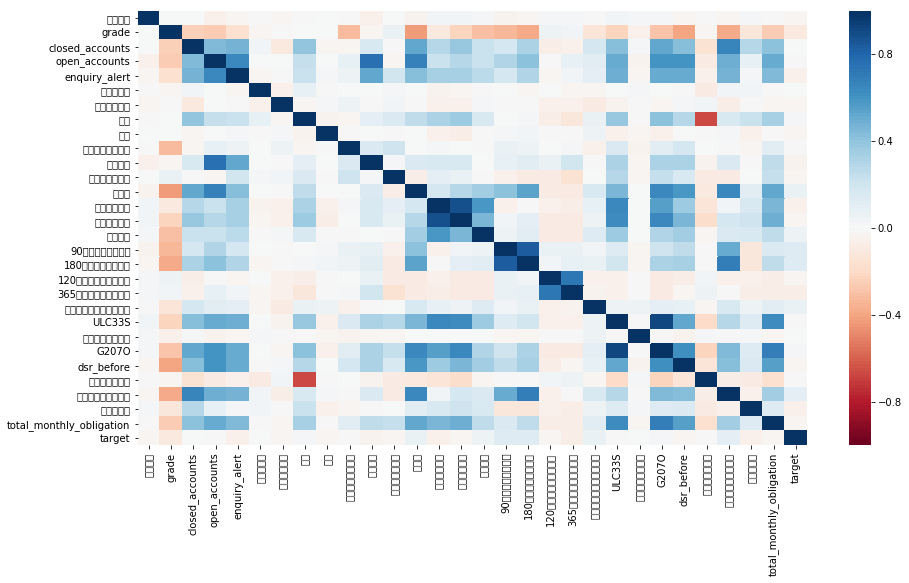

          申请时段     grade  closed_accounts  open_accounts  enquiry_alert  \
0     1.205384 -0.017450         1.217007       0.082113       0.123486   
1     1.386679 -0.017450        -0.743539       0.082113       0.294669   
2    -0.244974 -0.597741         3.479174       0.418088       0.522912   
3    -0.607564 -0.597741         2.121874      -0.253862       0.152016   
4    -0.788858 -0.017450        -0.592727       0.082113      -0.218879   
5    -0.607564 -0.597741         1.066195       2.433940       0.637034   
6    -0.244974 -0.597741         0.161328       0.418088       1.122051   
7    -0.063679  1.143134        -0.592727      -1.597763      -0.875079   
8     1.205384 -0.017450         0.764573       0.754063       1.236173   
9     1.749268 -0.597741        -0.140294      -0.253862       0.237608   
10   -0.607564 -0.597741        -0.441916       0.418088       0.637034   
11   -0.063679 -0.597741         0.161328       1.090039       0.836747   
12    0.117615 -0.597741 

In [34]:
import seaborn as sns
%matplotlib inline

X = preprocessing()
plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(),vmin=-1,vmax=1,cmap=sns.color_palette("RdBu",n_colors=128))
plt.show()
Y = X['target']
X = X.drop(['target'],axis=1)
print(X)
print(Y)

In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

sample_solver = ADASYN(random_state=0)
X_train ,Y_train = sample_solver.fit_sample(X_train,Y_train)
print(X_train.shape)
print(X_test.shape)
print(Y.sum())
print(Y.count()-Y.sum())
print(Y.sum()/(Y.count()-Y.sum()))

(1952, 29)
(469, 29)
165
1398
0.118025751073


In [36]:
def doMetrics(Y_true,Y_predict_proba,clf_name):
    from sklearn.metrics import roc_auc_score
    print(roc_auc_score(Y_true,Y_predict_proba))

In [37]:
def plot(history, epochs):
    # 绘图
    history_dict = history.history
    epochs = range(1, epochs+1)

    flg = plt.figure()
    plt.subplot(2, 1, 1)
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'b', label='Training acc')
    plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    flg.tight_layout()
    plt.show()

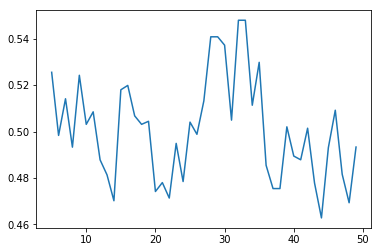

0.547971360382 32


In [42]:
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
batch_size = 32 

model = Sequential()
model.add(Dense(256, input_shape=(29,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy','crossentropy'])
scores = []
start = 5
stop = 50
steps = 1
epochs_range = range(start,stop,steps)
for epochs in epochs_range:
    history = model.fit(X_train, Y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=0, 
                    validation_data=(X_test, Y_test),
                    class_weight='auto')
    predict = model.predict(X_test)
    score = roc_auc_score(Y_test,predict)
    scores.append(score)
plt.plot(epochs_range,scores)
plt.show()
print(max(scores), start + steps * scores.index(max(scores)))

In [39]:
doMetrics(Y_test,(predict > 0.2),'cnn')

0.493508353222


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
rs = cross_val_score()